<a href="https://colab.research.google.com/github/ProteintechLab/Statistics/blob/main/datavisualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext rpy2.ipython

# This line of code allows Colab to interpret R commands

In [ ]:
%%R #This tells python that we are coding in R
install.packages("readxl")
library(readxl)
install.packages("tidyr")
library(tidyr)
install.packages("dplyr")
library(dplyr)
library(ggplot2)
# These load in the tidyverse, dplyr, ggplot2 and read excel packages

In [ ]:
%%R
download.file("https://github.com/ProteintechLab/Statistics/raw/main/IL6.xlsx", "IL6.xlsx")

# This downloads the IL6 data set from our github and stores it as IL6.xlsx

In [ ]:
%%R
IL6<-read_excel("IL6.xlsx")

# This line reads the IL6 data in the excel sheet IL6.xlsx and stores it as the variable IL6

In [ ]:
%%R
IL6

# This prints the data stored in IL6

In [ ]:
%%R
IL6$Conc<-(IL6$Conc)/1000
IL6

# This divides the concentration values by 1000, making them more manageable.

In [ ]:
%%R
sumIL6<-IL6%>%group_by(Treat,Day)%>%summarise(meanIL6=mean(Conc), sdIL6=sd(Conc))
sumIL6

# This groups the IL6 data by treatment and day, and then calculates the mean and
# standard deviation of the concentration, storing this as meanIL6 and sdIL6.

In [ ]:
%%R
str(sumIL6)

# This tells us more about the structure of the data, highlighting that 'day' is numeric.

In [ ]:
%%R
sumIL6$Day<-factor(sumIL6$Day)

# This recharacterises day as a factor

In [ ]:
%%R
str(sumIL6)

# This tells us more about the structure of the data, highlighting that 'day' is
# now a factor, not a number

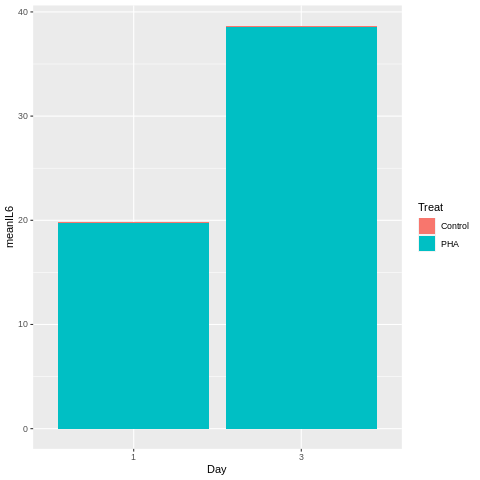

In [ ]:
%%R
sumIL6%>%ggplot(aes(Day, meanIL6, fill=Treat))+geom_bar(stat="identity")

# This plots the data as a barplot using ggplot2, plotting Day on the x axis, and
# meanIL6 on the y axis. fill=Treat assigns different colours to the two treatment
# conditions present, control and PHA. geom_bar plots it as a bar graph, with
# stat="identity" ensuring the data is not plotted as a histogram.


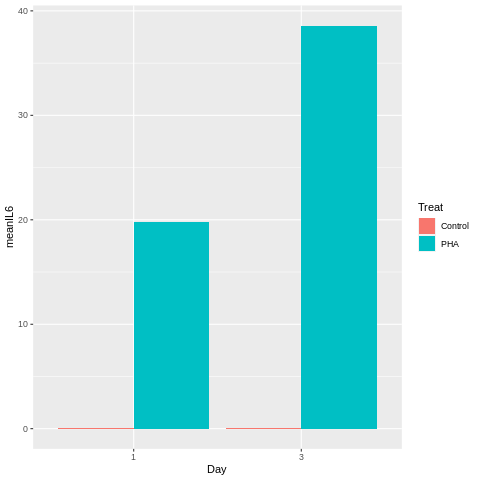

In [ ]:
%%R
sumIL6%>%ggplot(aes(Day, meanIL6, fill=Treat))+geom_bar(stat="identity",position = position_dodge())

# The position = position_dodge() prevents the bars from stacking.

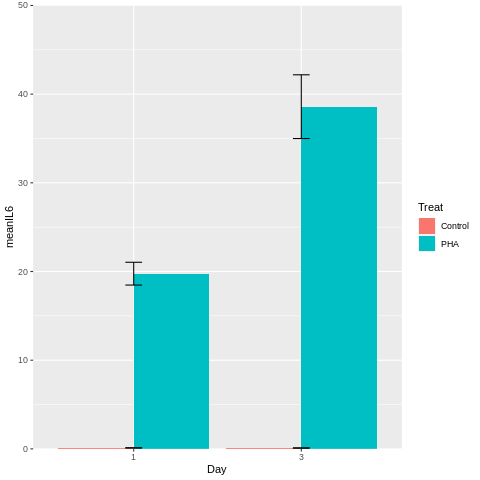

In [ ]:
%%R
sumIL6%>%ggplot(aes(Day, meanIL6, fill=Treat))+geom_bar(stat="identity", position = position_dodge())+
geom_errorbar(aes(ymin = meanIL6-sdIL6, ymax = meanIL6+sdIL6), width=0.1)+
scale_y_continuous(limits = c(0, 50), expand = c(0, 0))

# geom_errorbar plots error bars on our graph, with the min and max being determined by
# ymin and ymax (in this case mean-sd). The width can also be set.
# The scale of the y axis is set using scale-y-continuous.

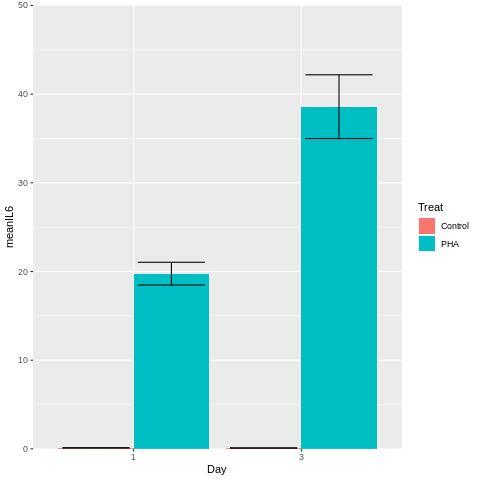

In [ ]:
%%R
sumIL6%>%ggplot(aes(Day, meanIL6, fill=Treat))+geom_bar(stat="identity", position = position_dodge())+
geom_errorbar(aes(ymin = meanIL6-sdIL6, ymax = meanIL6+sdIL6), position=position_dodge(.9), width=0.8)+
scale_y_continuous(limits = c(0, 50), expand = c(0, 0))

# The position_dodge function is utilised again to move the error bars. Width is also adjusted.

Saving 6.67 x 6.67 in image


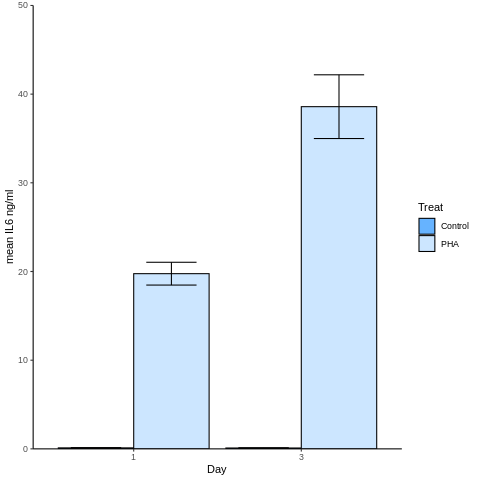

In [ ]:
%%R
p2<-sumIL6%>%ggplot(aes(Day, meanIL6, fill=Treat))+geom_bar(stat="identity", position = position_dodge(),colour="black")+
geom_errorbar(aes(ymin = meanIL6-sdIL6, ymax = meanIL6+sdIL6), position=position_dodge(.9), width=0.6)+
scale_y_continuous(limits = c(0, 50), expand = c(0, 0))+ylab("mean IL6 ng/ml")+
scale_fill_manual(values=c('#66b3ff', '#cce6ff'))+theme_classic()
p2
ggsave("p2.png")
p2

# Here the graph is altered to be more visually appealing. Black outlines are added using colour="black".
# The colours of the fill are selected using HTML colour codes and the scale_fill_manual function.
# The graph is saved using the ggsave command. The y axis label is changed using the ylab("") function.
